### Imports


In [18]:
import pandas as pd
import numpy as np
import string
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
from sklearn.feature_extraction.text import CountVectorizer

# Ensure NLTK components are available
nltk.download('stopwords')
nltk.download('punkt')
nltk.download('wordnet')
nltk.download('omw-1.4')

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/elloyd/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /Users/elloyd/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to /Users/elloyd/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to /Users/elloyd/nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


True

### Data load


In [19]:
# Step 1: Load raw text from NLP.txt
with open("NLP.txt", "r", encoding="utf-8") as file:
    raw_text = file.read()


### Data Prep


In [20]:
# Step 2: Preprocessing function
lemmatizer = WordNetLemmatizer()
stop_words = set(stopwords.words('english'))
punct_table = str.maketrans('', '', string.punctuation)

def preprocess(text):
    tokens = word_tokenize(text)
    print(f"Tokens before preprocessing: {tokens}")

    tokens = [t.lower().translate(punct_table) for t in tokens if t.isalnum()]
    print(f"Tokens after removing punctuation and lowercasing: {tokens}")

    tokens = [t for t in tokens if t not in stop_words]
    print(f"Tokens after removing stopwords: {tokens}")

    tokens = [lemmatizer.lemmatize(t) for t in tokens]
    print(f"Tokens after lemmatization: {tokens}")
    
    return ' '.join(tokens)


### Process and Store in DF


In [21]:
# Step 3: Process text and store in a DataFrame
sentences = raw_text.strip().split("\n")
df = pd.DataFrame(sentences, columns=["original"])
df["cleaned"] = df["original"].apply(preprocess)

Tokens before preprocessing: ['Until', 'recently', ',', 'the', 'conventional', 'wisdom', 'was', 'that', 'while', 'AI', 'was', 'better', 'than', 'humans', 'at', 'data-driven', 'decision', 'making', 'tasks', ',', 'it', 'was', 'still', 'inferior', 'to', 'humans', 'for', 'cognitive', 'and', 'creative', 'ones', '.', 'But', 'in', 'the', 'past', 'two', 'years', 'language-based', 'AI', 'has', 'advanced', 'by', 'leaps', 'and', 'bounds', ',', 'changing', 'common', 'notions', 'of', 'what', 'this', 'technology', 'can', 'do', '.']
Tokens after removing punctuation and lowercasing: ['until', 'recently', 'the', 'conventional', 'wisdom', 'was', 'that', 'while', 'ai', 'was', 'better', 'than', 'humans', 'at', 'decision', 'making', 'tasks', 'it', 'was', 'still', 'inferior', 'to', 'humans', 'for', 'cognitive', 'and', 'creative', 'ones', 'but', 'in', 'the', 'past', 'two', 'years', 'ai', 'has', 'advanced', 'by', 'leaps', 'and', 'bounds', 'changing', 'common', 'notions', 'of', 'what', 'this', 'technology', '

In [22]:
# Step 4: Convert to Bag-of-Words
vectorizer = CountVectorizer()
X_bow = vectorizer.fit_transform(df["cleaned"])


In [23]:
# Step 5: Export to CSV
bow_df = pd.DataFrame(X_bow.toarray(), columns=vectorizer.get_feature_names_out())
bow_df.to_csv("bow_matrix_from_txt.csv", index=False)
print("BoW matrix saved as 'bow_matrix_from_txt.csv'")

BoW matrix saved as 'bow_matrix_from_txt.csv'


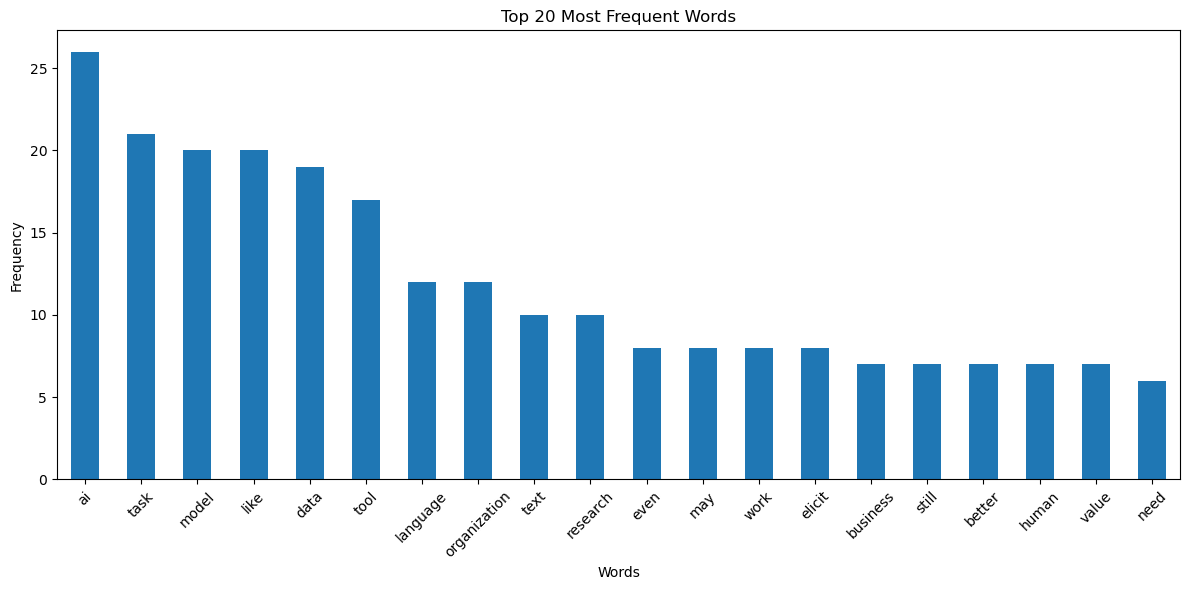

In [24]:
import matplotlib.pyplot as plt

# Sum word counts across all documents
word_freq = bow_df.drop(columns=["label"]).sum().sort_values(ascending=False)

# Select top 20 words
top_n = 20
top_words = word_freq.head(top_n)

# Plot
plt.figure(figsize=(12, 6))
top_words.plot(kind='bar')
plt.title(f"Top {top_n} Most Frequent Words")
plt.xlabel("Words")
plt.ylabel("Frequency")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()